# Money and Happiness

There are many sayings out there that discourage attaching one's happiness on wealth and material things. I, for one, believe that money can definitely provide happiness how ever short it may live. It may be the consumerist nature of the world we live in, but another way to interpret that is that the positive reinforcement that one gets from spending money or having lots of money makes one a consumerist. Needless to say, the definition of happiness is as multifaceted and varied as the number of people on Earth. In today's culture where convenience easily outweighs our ideals and virtues, I want to explore how big of a part wealth plays in one's happiness by analyzing the World Happiness Report.

## The data 

I will be looking at the 2017 World Happiness Report which also gathers survey data from 155 countries in aggregating the Happiness Score along with other factor scores such as GDP and health.

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

# Import dataset
report = pd.read_csv('2017whr.csv')
report.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


So let's take a dive into the dataset.

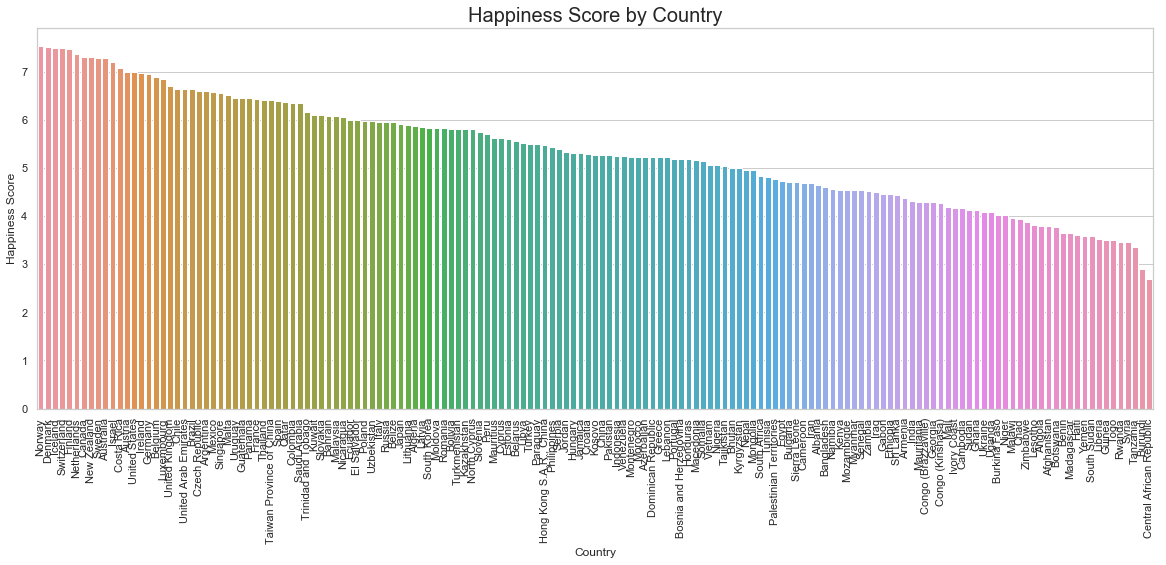

In [15]:
# Happiness Score by country
f, ax = plt.subplots(figsize=(20, 7))
sns.set(style='whitegrid')

x = 'Country'
y = 'Happiness.Score'

ax = sns.barplot(x=x, y=y, data=report)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Happiness Score')
plt.title('Happiness Score by Country', fontsize=20)
plt.show()

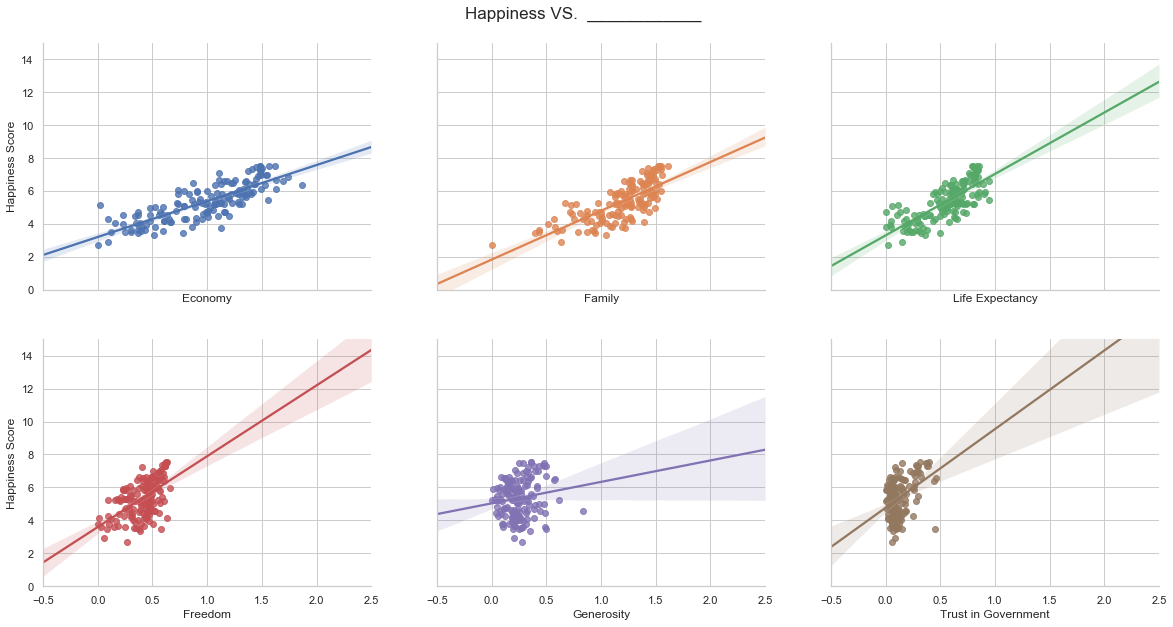

In [61]:
# Scatter plots to show relationships between score and factors
f, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=True, sharey=True)

# Set x & y axes limits
xlim = [-0.5, 2.5]
ylim = [0, 15]

sns.set(style='whitegrid')
sns.despine()

# Economy Scatter plot
ax1 = axes[0, 0]
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
sns.regplot(x='Economy..GDP.per.Capita.', y=y, data=report, ax=ax1)
ax1.set_xlabel('Economy')
ax1.set_ylabel('Happiness Score')

# Family Scatter plot
ax2 = axes[0, 1]
sns.regplot(x='Family', y=y, data=report, ax=ax2)
ax2.set_ylabel('')

# Life expectancy Scatter plot
ax3 = axes[0, 2]
sns.regplot(x='Health..Life.Expectancy.', y=y, data=report, ax=ax3)
ax3.set_xlabel('Life Expectancy')
ax3.set_ylabel('')

# Freedom Scatter plot
ax4 = axes[1, 0]
sns.regplot(x='Freedom', y=y, data=report, ax=ax4)
ax4.set_ylabel('Happiness Score')

# Generosity Scatter plot
ax5 = axes[1, 1]
sns.regplot(x='Generosity', y=y, data=report, ax=ax5)
ax5.set_xlabel('Generosity')
ax5.set_ylabel('')

# Trust in gov't Scatter plot
ax6 = axes[1, 2]
sns.regplot(x='Trust..Government.Corruption.', y=y, data=report, ax=ax6)
ax6.set_xlabel('Trust in Government')
ax6.set_ylabel('')

plt.suptitle('Happiness VS.  ____________', y=0.93, fontsize=17)
plt.show()

From looking at these scatter plots, it seems they all have a positive correlation with the happiness score, with the most obvious being trust in the government and freedom, while generosity seems to have the least amount positive effect on how high a person scores his/her happiness. 

## Research Proposal 

A U.S.-based company has grown and is looking to expand their operations overseas. The CEO of the company is convinced that happier employees make for a better working environment. So he already knows that generally speaking higher earning employees respond more favorably in the annual employee satisfaction survey. He tasks his data science team to figure out whether the location of the new office matters or the only thing that matters is money.

### The problem 

Although we will hire from the local talent, we would need to send a team ahead of time to lay the logistical foundation of the new branch. Since existing employees will have to relocate to an overseas office, we have to figure out whether a raise or a new environment will make the employees happier. Since we already know that generally higher salaries mean happier employees, we need to find out employee happiness is an element that needs to be factored in when scouting for possible new locations. 

### The hypothesis 

We believe that a cash incentive will make the relocating employees happier than the any improvement in surrounding environment.

### The method 

We will desginate three randomly selected groups of 100 employees to take part in this research. We will follow the selection closely to ensure that demographics are represented equally to keep sample bias to a minimum. The study will last for 12 months and data from each employee will be collected using same type of questions used for the World Happiness Report for a total of 1200 data points for each group.

The three groups will be as follows:  
Group A (Test Group #1): This group will be send to the new office in Norway (who ranks number 1 in the World Happiness Ranking) but will keep the same pay grade.  
Group B (Test Group #2): This group will be working in their current location, but will get a pay increase.
Group C (Control): The selected employees will carry on as normal in their current position in salary and location.   

We will monitor the the happiness scores for all three groups monthly. In the first couple of months, there might exist and adjustment period for the test groups due to new environment or that extra moola in the bank account. The control group will give us a baseline for which we can compare the increase or decrease in happiness.

Possible outcomes:  
If the salary test group out paces the location test group who out paces the control group we can conlude that there should exist a level of pay increase less than the test amount that will keep the employees happy at the new office (Order B-A-C). 

If the order of happiness score is A-B-C, then there might not be any reason for a relocation pay increase.

For order B-C-A, the cash incentive might have to be even higher than the test amount to intice employees to relocate to the new office.

Since we can safely assume that getting paid more is generally well received, group C probably won't outscore group B. (If there is, this might mean trouble for the company)